In [1]:
# Numerical library
import numpy as np

# Data manipulation
import pandas as pd
#from patsy import dmatrix

# Ploting
import matplotlib.pyplot as plt
import matplotlib
# Survival analysis
import lifelines

from IPython.display import *



In [2]:
%matplotlib inline

In [3]:
clinical = pd.read_csv('male_sum_sur.csv')



In [4]:
clinical.head()

,m,status,survival_days,gender,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,1,alive,1776,male,-0.639738,-0.415185,-0.771855,-1.190351,-0.503066,-0.561893,...,0.779592,-0.829817,-0.157804,-0.850672,0.494791,-0.306227,-0.336862,-0.174654,-0.708641,-0.605663
1,8,alive,426,male,-0.737496,-0.474688,-0.846680,-0.961109,-0.482099,-0.586074,...,-0.261894,-0.829817,-0.157804,-0.460162,-0.551202,-0.306227,-0.336862,-0.174654,-0.746025,1.994379
2,11,alive,1915,male,-0.738865,-0.454854,-0.487517,-0.205159,-0.702253,-0.626377,...,-0.261894,0.149639,-0.157804,-0.340005,0.494791,-0.306227,-0.336862,-0.174654,0.674537,-0.605663
3,12,alive,821,male,-1.005941,-0.484605,-1.106268,-1.029336,-1.030737,-0.123940,...,-0.261894,-0.829817,-0.157804,-0.760554,-0.899867,-0.306227,-0.336862,-0.174654,-0.446959,-0.605663
4,18,alive,518,male,0.892922,-0.256511,0.391398,0.670871,0.031594,-0.661306,...,-0.261894,0.639367,-0.157804,0.020465,0.262348,-0.306227,-0.336862,0.042552,0.487621,-0.605663


In [5]:
clinical['status'] = (clinical['status'] == 'dead')*1

In [6]:
from lifelines import KaplanMeierFitter

In [7]:
kmf=KaplanMeierFitter()
kmf.fit(clinical['survival_days'], clinical['status'])

<lifelines.KaplanMeierFitter: fitted with 341 observations, 281 censored>

Populating the interactive namespace from numpy and matplotlib


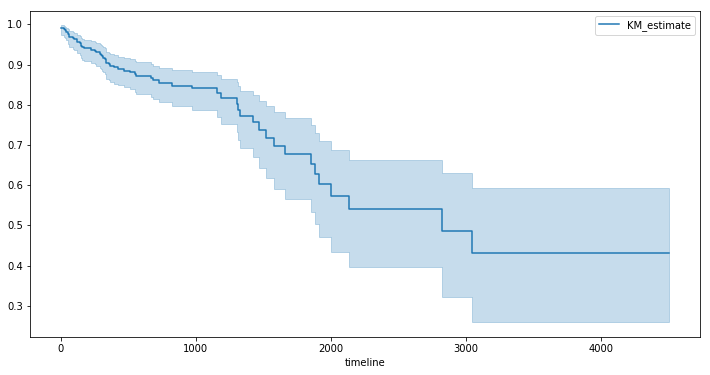

In [8]:
%pylab inline
figsize(12,6)
kmf.plot()

In [9]:
data = clinical
data.head()


,m,status,survival_days,gender,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,1,0,1776,male,-0.639738,-0.415185,-0.771855,-1.190351,-0.503066,-0.561893,...,0.779592,-0.829817,-0.157804,-0.850672,0.494791,-0.306227,-0.336862,-0.174654,-0.708641,-0.605663
1,8,0,426,male,-0.737496,-0.474688,-0.846680,-0.961109,-0.482099,-0.586074,...,-0.261894,-0.829817,-0.157804,-0.460162,-0.551202,-0.306227,-0.336862,-0.174654,-0.746025,1.994379
2,11,0,1915,male,-0.738865,-0.454854,-0.487517,-0.205159,-0.702253,-0.626377,...,-0.261894,0.149639,-0.157804,-0.340005,0.494791,-0.306227,-0.336862,-0.174654,0.674537,-0.605663
3,12,0,821,male,-1.005941,-0.484605,-1.106268,-1.029336,-1.030737,-0.123940,...,-0.261894,-0.829817,-0.157804,-0.760554,-0.899867,-0.306227,-0.336862,-0.174654,-0.446959,-0.605663
4,18,0,518,male,0.892922,-0.256511,0.391398,0.670871,0.031594,-0.661306,...,-0.261894,0.639367,-0.157804,0.020465,0.262348,-0.306227,-0.336862,0.042552,0.487621,-0.605663


,test_statistic,p
0,1.886023,0.169651


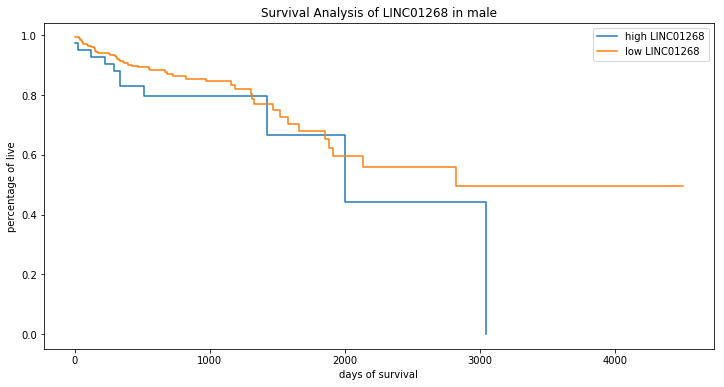

In [10]:


### Define groups here
treshold =0

group_1 = data.loc[data['ENSG00000261208'] > treshold]
group_2 = data.loc[data['ENSG00000261208'] <= treshold]
###
###

kmf.fit(group_1['survival_days'], group_1['status'], label='high LINC01268')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['survival_days'], group_2['status'], label='low LINC01268')
kmf.plot(ax=ax, ci_show=False)

plt.title('Survival Analysis of LINC01268 in male')
plt.xlabel('days of survival')
plt.ylabel('percentage of live')

from lifelines.statistics import logrank_test

test = logrank_test(group_1['survival_days'], group_2['survival_days'], event_observed_A=group_1['status'], event_observed_B=group_2['status'])
test.summary